In [ ]:
import cv2 as cv
import sys
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# ---------- Show Function ----------
def show_image(img, title="Image"):
    """Display an image inline in Jupyter."""
    plt.figure(figsize=(6,6))
    if len(img.shape) == 2:  # grayscale
        plt.imshow(img, cmap="gray")
    else:  # color (BGR → RGB)
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [33]:
def pencil_sketch(img):
    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Invert image
    inv = 255 - gray
    # Gaussian blur
    blur = cv.GaussianBlur(inv, (21, 21), 0)
    # Dodge blend
    sketch = cv.divide(gray, 255 - blur, scale=256)
    return sketch

In [ ]:
def sketch(img):
    # Grayscale and median blur for smooth edges
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.medianBlur(gray, 7)
    # Use Laplacian for sharp edges
    edges = cv.Laplacian(blur, cv.CV_8U, ksize=5)
    _, sketch_img = cv.threshold(edges, 70, 255, cv.THRESH_BINARY_INV)
    return sketch_img




In [42]:
def cartoonize(img):
    # Edge detection
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.medianBlur(gray, 3)
    # Edge detection
    edges = cv.adaptiveThreshold(
        blur, 255,
        cv.ADAPTIVE_THRESH_MEAN_C,
        cv.THRESH_BINARY, 9, 9
    )
    # Reduce noise while keeping edges
    color = cv.bilateralFilter(img, d=5, sigmaColor=100, sigmaSpace=100)
    cartoon = cv.bitwise_and(color, color, mask=edges)
    return cartoon

In [44]:
# ghibli style
def ghibli_style(img):
    # 1. Edge-preserving smoothing (looks more like painting than blur)
    painting = cv.edgePreservingFilter(img, flags=1, sigma_s=80, sigma_r=0.4)

    # 2. Slight bilateral filter for soft color blending
    painting = cv.bilateralFilter(painting, d=5, sigmaColor=75, sigmaSpace=75)

    # 3. Convert to HSV to boost saturation (Ghibli colors are vibrant)
    hsv = cv.cvtColor(painting, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    s = cv.add(s, 20)  # increase saturation
    v = cv.add(v, 10)  # slightly brighten
    hsv = cv.merge([h, s, v])
    painting = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

    # 4. Detect edges (thin ink-like lines)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    edges = cv.adaptiveThreshold(
        gray, 255,
        cv.ADAPTIVE_THRESH_MEAN_C,
        cv.THRESH_BINARY, 9, 9
    )
    edges = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)

    # 5. Overlay edges on painting
    ghibli = cv.bitwise_and(painting, edges)

    return ghibli

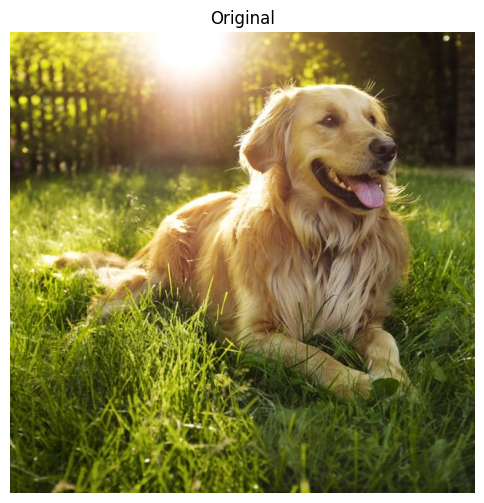

In [36]:
#----------------load image----------------------
img = cv.imread("pictures/dog.jpg")
show(img,"Original")

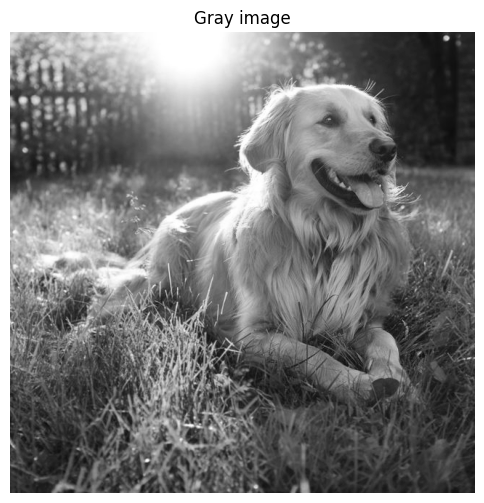

In [38]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show(gray_img,"Gray image")

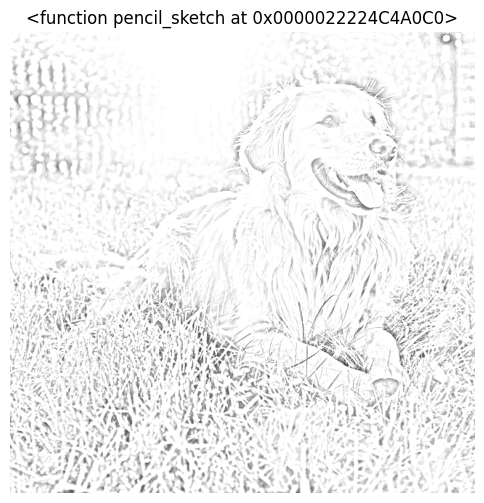

In [39]:
pencil = pencil_sketch(img)
show(pencil,pencil_sketch)

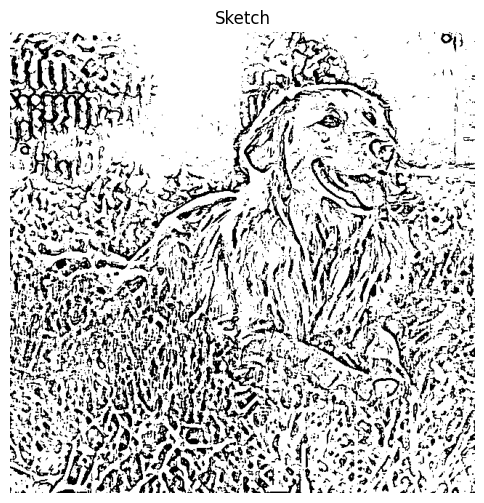

In [40]:
sketch_img = sketch(img)
show(sketch_img, "Sketch")

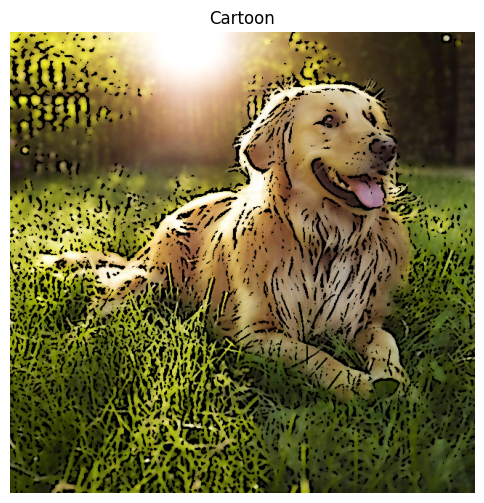

In [43]:
cartoon = cartoonize(img)
show_image(cartoon, "Cartoon")


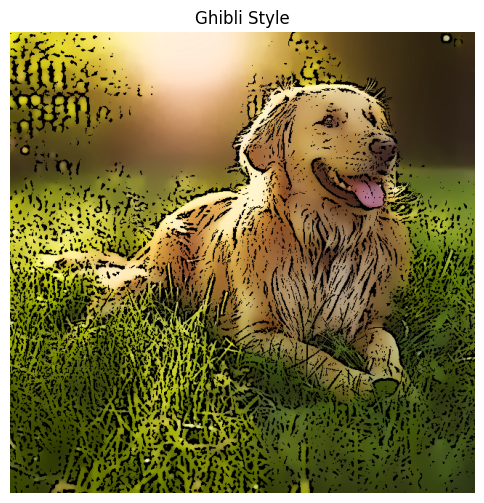

In [45]:
#--------------Ghibli style----------------------
ghibli_img = ghibli_style(img)
show_image(ghibli_img, "Ghibli Style")